# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [832]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import r2_score
from scipy.stats import skew 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [833]:
#Read data file
df=pd.read_csv('train.csv')
#Check shape of dataset
print(df.shape)

(1460, 81)


In [834]:
#Check info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [835]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Analysis and Cleaning

### Highly null values columns

In [836]:
#Checking null percentage columnwise
(df.isnull().sum()/len(df)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [837]:
#Find columns with columns more than 10% nan values

null_dict=dict(zip((df.isnull().sum()/len(df)*100).keys(),(df.isnull().sum()/len(df)*100).values))

drop_list=list(dict(filter(lambda e:e[1]>=10,null_dict.items())).keys())
print(drop_list)

#Drop columns
df.drop(columns=drop_list,axis=1,inplace=True)

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [838]:

for i in drop_list:
    del null_dict[i]
df.shape

(1460, 75)

In [839]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Viewing data details in dataset
- List unique values for columns with 30 or less unique values
- Show the percentage occupied in column by each value
- Show the count and range of unique values for greater than 30


In [840]:
#Viewing data details in dataset
for i in df.columns:
    print(i+': ',end='')
    if(len(df[i].unique())<=30):
        #print(df[i].unique())
        print(round(df[i].value_counts()/len(df)*100),3)
    else:
        print('\tunique count = {}, range = [ {}-{} ]'.format(len(df[i].unique()),df[i].min(),df[i].max()))

Id: 	unique count = 1460, range = [ 1-1460 ]
MSSubClass: 20     37.0
60     20.0
50     10.0
120     6.0
30      5.0
160     4.0
70      4.0
80      4.0
90      4.0
190     2.0
85      1.0
75      1.0
45      1.0
180     1.0
40      0.0
Name: MSSubClass, dtype: float64 3
MSZoning: RL         79.0
RM         15.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64 3
LotArea: 	unique count = 1073, range = [ 1300-215245 ]
Street: Pave    100.0
Grvl      0.0
Name: Street, dtype: float64 3
LotShape: Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64 3
LandContour: Lvl    90.0
Bnk     4.0
HLS     3.0
Low     2.0
Name: LandContour, dtype: float64 3
Utilities: AllPub    100.0
NoSeWa      0.0
Name: Utilities, dtype: float64 3
LotConfig: Inside     72.0
Corner     18.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64 3
LandSlope: Gtl    95.0
Mod     4.0
Sev     1.0
Name: LandSlope, dtype: float64 3
Neighborhood

##### Observations
- Few columns have less variance in data. Hence we can drop columns with 5% or less variance
- Many columns have population occupying less than 1% which can be clubbed to others
- We can check if any of the year columns are redundant based on the correlation amongst them
- Year can be converted to age w.r.t 2020

In [841]:
#Find columns with 95% or more same data
drop_list=[]
for i in df.columns:
    if(i!='Id'):
        #print(list(df[i].value_counts())[0])
        if((round(list(df[i].value_counts())[0]/len(df)*100),2)[0]>=95):
            drop_list.append(i)
print(drop_list)


['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [842]:
#Drop columns identified with 95%  or more same data
df.drop(columns=drop_list,axis=1,inplace=True)
df.shape

(1460, 64)

In [843]:
#Combine categories less than 1.2% to a single 'Others' category
for i in df.columns[1:]:
    if(df[i].dtype=='object'):
        uniq=dict(df[i].value_counts()/len(df)*100)
        final = dict(filter(lambda e: e[1] <= 1.2, uniq.items()))
        if(len(final)>1):
            keys=list(final.keys())
            values=[ 'Others' for i in range(0,len(final))]
            col_rep=dict(zip(keys,values))
            print('{}: {} = {}%'.format(i,keys,round(sum(final.values()),2)))
            print()
            df=df.replace({i:col_rep})
       

MSZoning: ['RH', 'C (all)'] = 1.78%

Neighborhood: ['MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'] = 4.93%

Condition1: ['RRAe', 'PosA', 'RRNn', 'RRNe'] = 1.78%

HouseStyle: ['1.5Unf', '2.5Unf', '2.5Fin'] = 2.26%

RoofStyle: ['Flat', 'Gambrel', 'Mansard', 'Shed'] = 2.26%

Exterior1st: ['BrkComm', 'Stone', 'AsphShn', 'CBlock', 'ImStucc'] = 0.48%

Exterior2nd: ['ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock'] = 1.85%

ExterCond: ['Ex', 'Po'] = 0.27%

Foundation: ['Stone', 'Wood'] = 0.62%

Electrical: ['FuseP', 'Mix'] = 0.27%

Functional: ['Mod', 'Maj1', 'Maj2', 'Sev'] = 2.4%

GarageType: ['CarPort', '2Types'] = 1.03%

GarageQual: ['Gd', 'Ex', 'Po'] = 1.37%

GarageCond: ['Gd', 'Po', 'Ex'] = 1.23%

SaleType: ['ConLD', 'ConLw', 'ConLI', 'CWD', 'Oth', 'Con'] = 1.92%

SaleCondition: ['Alloca', 'AdjLand'] = 1.1%



In [844]:
#Verifying data with 'Others' 
for i in df.columns[1:]:
    if( df[i].dtype=='object'):
        print('{}: {}'.format(i,df[i].unique()))

MSZoning: ['RL' 'RM' 'Others' 'FV']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood: ['CollgCr' 'Others' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'SWISU']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'Others' 'RRAn']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' 'Others' 'SFoyer' 'SLvl']
RoofStyle: ['Gable' 'Hip' 'Others']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'Others']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Others']
MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Others']
Foundation: ['PConc' 'CBlock' 'BrkTil' '

### Correlation between Year columns

In [845]:
#Check % of rows different in YearRemodAdd,GarageYrBlt, YrSold w.r.t YearBuilt
df1=df[['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
df1['Diff_Year1']=df['YearRemodAdd']-df['YearBuilt']
print('Variance of YearRemodAdd w.r.t YearBuilt:\t{}%'.format(round(100-len(df1.query('Diff_Year1=="0"'))/(len(df1)-df1['YearRemodAdd'].isnull().sum())*100,2)))
df1['Diff_Year2']=df['GarageYrBlt']-df['YearBuilt']
print('Variance of GarageYrBlt w.r.t YearBuilt: \t{}%'.format(round(100-len(df1.query('Diff_Year2=="0"'))/(len(df1)-df1['GarageYrBlt'].isnull().sum())*100,2)))
df1['Diff_Year3']=df['YrSold']-df['YearBuilt']
print('Variance of YrSold w.r.t YearBuilt: \t\t{}%'.format(round(100-len(df1.query('Diff_Year3=="0"'))/(len(df1)-df1['YrSold'].isnull().sum())*100,2)))


Variance of YearRemodAdd w.r.t YearBuilt:	47.67%
Variance of GarageYrBlt w.r.t YearBuilt: 	21.03%
Variance of YrSold w.r.t YearBuilt: 		95.62%


Text(0.5, 1, 'Correlation between Year columns')

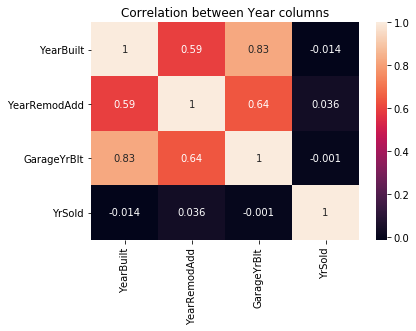

In [846]:
#Heatmap of correlation between Year columns
sns.heatmap(df1[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].corr(),annot=True)
plt.title('Correlation between Year columns')

#### Observation
- This indicates that 48% of the buildings have a different remodel year from the built year
- This indicates that 21% of GarageYrBlt varies from YearBuilt
- Correlation between GarageYrBlt and YearBuilt is high(0.83). Hence this column can be dropped
- This indicates that 96% of YrSold differs with respect to YearBuilt

In [847]:
#Dropping GarageYrBlt
df.drop(columns='GarageYrBlt',axis=1,inplace=True)

### Converting Year to Age

In [848]:
#Keep copy before changing
df_orig=df.copy()

#Check max and min values
print('Max Value')
print(df[['YearBuilt','YrSold','YearRemodAdd']].max())
print('\nMin value')
print(df[['YearBuilt','YrSold','YearRemodAdd']].min())
print(df.shape)

Max Value
YearBuilt       2010
YrSold          2010
YearRemodAdd    2010
dtype: int64

Min value
YearBuilt       1872
YrSold          2006
YearRemodAdd    1950
dtype: int64
(1460, 63)


In [849]:
#Find Age from 2020 and store as Age columns
df['YearBuiltAge']=2020-df['YearBuilt']
df['YearRemodAddAge']=2020-df['YearRemodAdd']
df['YrSoldAge']=2020-df['YrSold']

In [850]:
#Drop original Year columns and retain Age columns
df.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [851]:
#check shape
df.shape

(1460, 63)

In [852]:

df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,YearBuiltAge,YearRemodAddAge,YrSoldAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,180921.195890,48.732192,35.134247,12.184247
std,421.610009,42.300571,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,79442.502883,30.202904,20.645407,1.328095
min,1.000000,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,10.000000,10.000000,10.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,20.000000,16.000000,11.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,163000.000000,47.000000,26.000000,12.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,214000.000000,66.000000,53.000000,13.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,755000.000000,148.000000,70.000000,14.000000


# Data Imputation

In [853]:
# Get list of columns with nan values
null_col=list(df.columns[df.isnull().any()])
print('Column_Name(DType) :\tNull% \t Null_Count ')
print('********************\t******\t************')
for i in null_col:
    print('{}({}) :\t{} \t {}'.format(i,df[i].dtype,round(df[i].isnull().sum()/len(df),2),df[i].isnull().sum()))
    

Column_Name(DType) :	Null% 	 Null_Count 
********************	******	************
MasVnrType(object) :	0.01 	 8
MasVnrArea(float64) :	0.01 	 8
BsmtQual(object) :	0.03 	 37
BsmtCond(object) :	0.03 	 37
BsmtExposure(object) :	0.03 	 38
BsmtFinType1(object) :	0.03 	 37
BsmtFinType2(object) :	0.03 	 38
Electrical(object) :	0.0 	 1
GarageType(object) :	0.06 	 81
GarageFinish(object) :	0.06 	 81
GarageQual(object) :	0.06 	 81
GarageCond(object) :	0.06 	 81


### Checking if GarageType is null because of no garage
- If all the other Garage columns are null we can assume that Garage is not present for the buiding/house
- Accordingly do imputation

In [854]:
#Checking null values for other Garage columns where GarageType is null
df1=df['GarageType'].isnull() & df['GarageFinish'].isnull() & df['GarageQual'].isnull() & df['GarageCond'].isnull()
print('GarageType_Nullcnt: {}'.format(df['GarageType'].isnull().sum()))
print('Column_Name:\tNullCntInColumn\t\tNullCnt_with_GarageTypeasNull')
print('************\t***************\t\t*****************************')
Gar_list=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in Gar_list:
    print('{}:\t{}\t\t\t{}'.format(i,df[i].isnull().sum(),df[i][df1].isnull().sum()))
i='GarageCars'
print('\n{}: null_cnt={}, col_sum={},col_min={},col_max={}'.format(i,df[i].isnull().sum(),df[i][df1].sum(),df[i][df1].min(),df[i][df1].max()))

GarageType_Nullcnt: 81
Column_Name:	NullCntInColumn		NullCnt_with_GarageTypeasNull
************	***************		*****************************
GarageType:	81			81
GarageFinish:	81			81
GarageQual:	81			81
GarageCond:	81			81

GarageCars: null_cnt=0, col_sum=0,col_min=0,col_max=0


##### Observation
- This indicates that for all GarageType is null, the other Garage columns are null
- Also GarageCars is 0 for all GarageType null
- That is Garage Type is no Garage and so other columns are invalid, not unkown
- This means we can replace null values with NoGarage in categorical Garage Columns and 0 in numerical ones

In [855]:
#Replace null values with NoGarage in categorical Garage Columns and 0 in Garage Cars
for i in Gar_list:
    if(df[i].dtype!='float64'):
        df[i]=df[i].fillna(value='NoGarage',axis=0)        
    else:
        df[i][df1]=0

In [856]:
#Since Garage columns are imputed,removing the same from null_col list which is yet to be imputed
for i in Gar_list:
    null_col.remove(i)

In [857]:
#Verifying if all rows of Garage Columns are imputed
for i in Gar_list:
    print('{} : {}'.format(i,df[i].isnull().sum()))
    print(df[i].unique())

GarageType : 0
['Attchd' 'Detchd' 'BuiltIn' 'Others' 'NoGarage' 'Basment']
GarageFinish : 0
['RFn' 'Unf' 'Fin' 'NoGarage']
GarageQual : 0
['TA' 'Fa' 'Others' 'NoGarage']
GarageCond : 0
['TA' 'Fa' 'NoGarage' 'Others']


In [858]:
len(df[df['TotalBsmtSF']==0])

37

In [859]:

BsmtCol=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','TotalBsmtSF','BsmtFinSF2', 'BsmtUnfSF']
#Checking null values for other Garage columns where GarageType is null
df1=df[BsmtCol[0]].isnull() & df[BsmtCol[1]].isnull() & df[BsmtCol[2]].isnull() & df[BsmtCol[3]].isnull() & df[BsmtCol[5]].isnull() 
print('Column_Name:\tNullCntInColumn\t\tNullCnt_with_BsmtQualasNull')
print('************\t***************\t\t*****************************')
#Gar_list=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in BsmtCol:
    print('{}:\t{}\t\t\t{}'.format(i,df[i].isnull().sum(),df[i][df1].isnull().sum()))
#Verifying if numerical columns are zero
for i in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print('\n{}: null_cnt={}, col_sum={},col_min={},col_max={}'.format(i,df[i].isnull().sum(),df[i][df1].sum(),df[i][df1].min(),df[i][df1].max()))

Column_Name:	NullCntInColumn		NullCnt_with_BsmtQualasNull
************	***************		*****************************
BsmtQual:	37			37
BsmtCond:	37			37
BsmtExposure:	38			37
BsmtFinType1:	37			37
BsmtFinSF1:	0			0
BsmtFinType2:	38			37
TotalBsmtSF:	0			0
BsmtFinSF2:	0			0
BsmtUnfSF:	0			0

BsmtFinSF1: null_cnt=0, col_sum=0,col_min=0,col_max=0

BsmtFinSF2: null_cnt=0, col_sum=0,col_min=0,col_max=0

BsmtUnfSF: null_cnt=0, col_sum=0,col_min=0,col_max=0

TotalBsmtSF: null_cnt=0, col_sum=0,col_min=0,col_max=0


In [860]:
BsmtCol.remove('BsmtFinSF1')
BsmtCol.remove('BsmtFinSF2')
BsmtCol.remove('BsmtUnfSF')
BsmtCol.remove('TotalBsmtSF')

In [861]:
#Replace null values with NoBasement in categorical Basement columns
#for i in BsmtCol:
df[df1]=df[df1].fillna(value='NoBasement',axis=0)

In [862]:
for i in BsmtCol:
    print('{}:\t{}\t\t\t{}'.format(i,df[i].isnull().sum(),df[i][df1].isnull().sum()))

BsmtQual:	0			0
BsmtCond:	0			0
BsmtExposure:	1			0
BsmtFinType1:	0			0
BsmtFinType2:	1			0


In [863]:
null_col.remove('BsmtQual')
null_col.remove('BsmtCond')
null_col.remove('BsmtFinType1')

### Categorical Columns with null values

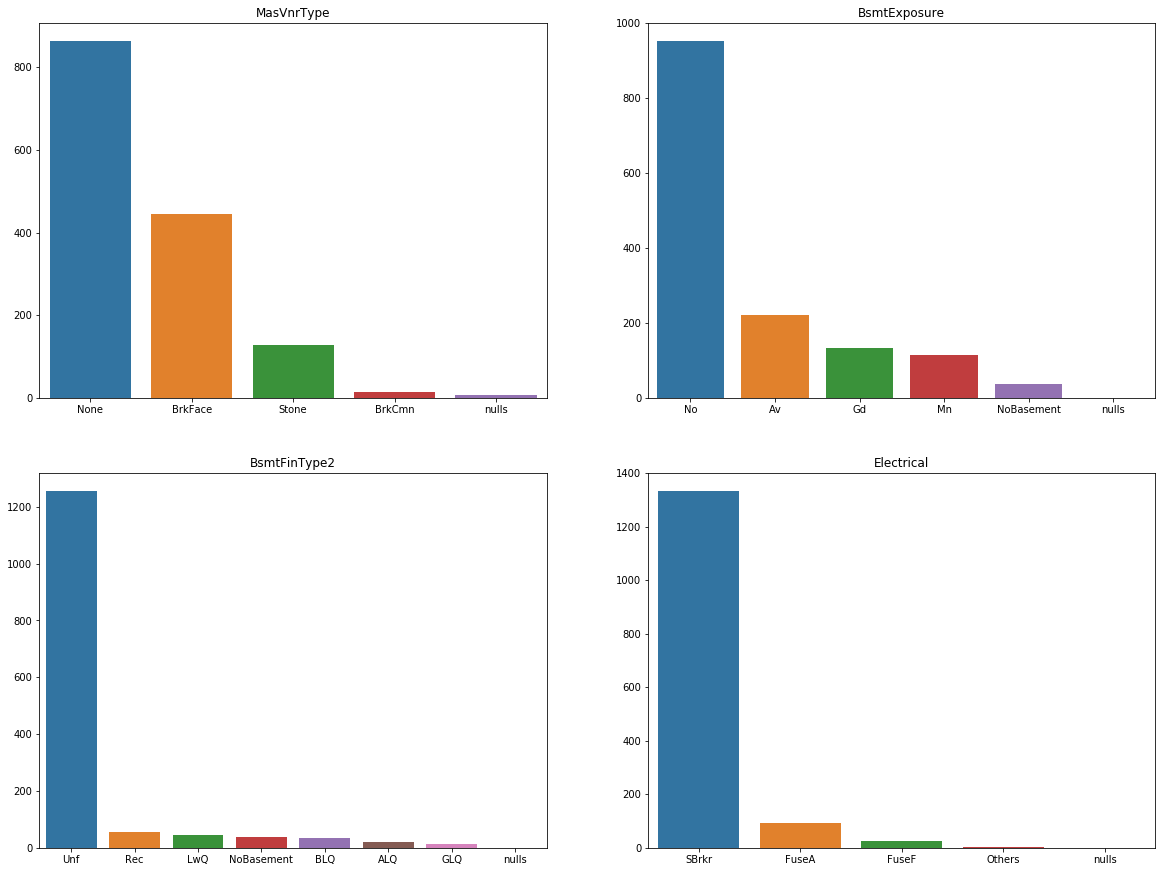

In [864]:
# Plot of Categorical columns with null values
plt.figure(figsize=(20,40))
j=1
for i in null_col:
    
    plt.subplot(len(null_col)-2//2+1,2,j)
    plt.title(i)
    count_dict=df[i].value_counts()
    if(i!='MasVnrArea' ) :
        j=j+1
        x=count_dict.keys()
        x=['{}'.format(k) for k in x]
        x.append('nulls')
        y=list(count_dict.values)
        y.append(df[i].isnull().sum())
        sns.barplot(x=x,y=y)

In [865]:
#Impute with highest occuring
for i in null_col:
    if(df[i].dtype!='float64'):
        print('{}: {}'.format(i,list(df[i].value_counts().keys())[0]))
        df[i].fillna(value=list(df[i].value_counts().keys())[0],inplace=True)

MasVnrType: None
BsmtExposure: No
BsmtFinType2: Unf
Electrical: SBrkr


In [866]:
#Verifying if all columns are imputed
for i in null_col:
    print('{} : {}'.format(i,df[i].isnull().sum()))

MasVnrType : 0
MasVnrArea : 8
BsmtExposure : 0
BsmtFinType2 : 0
Electrical : 0


- MasVnrArea is a numerical column, hence not imputated still

### Imputation for numerical columns

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text xticklabel objects>)

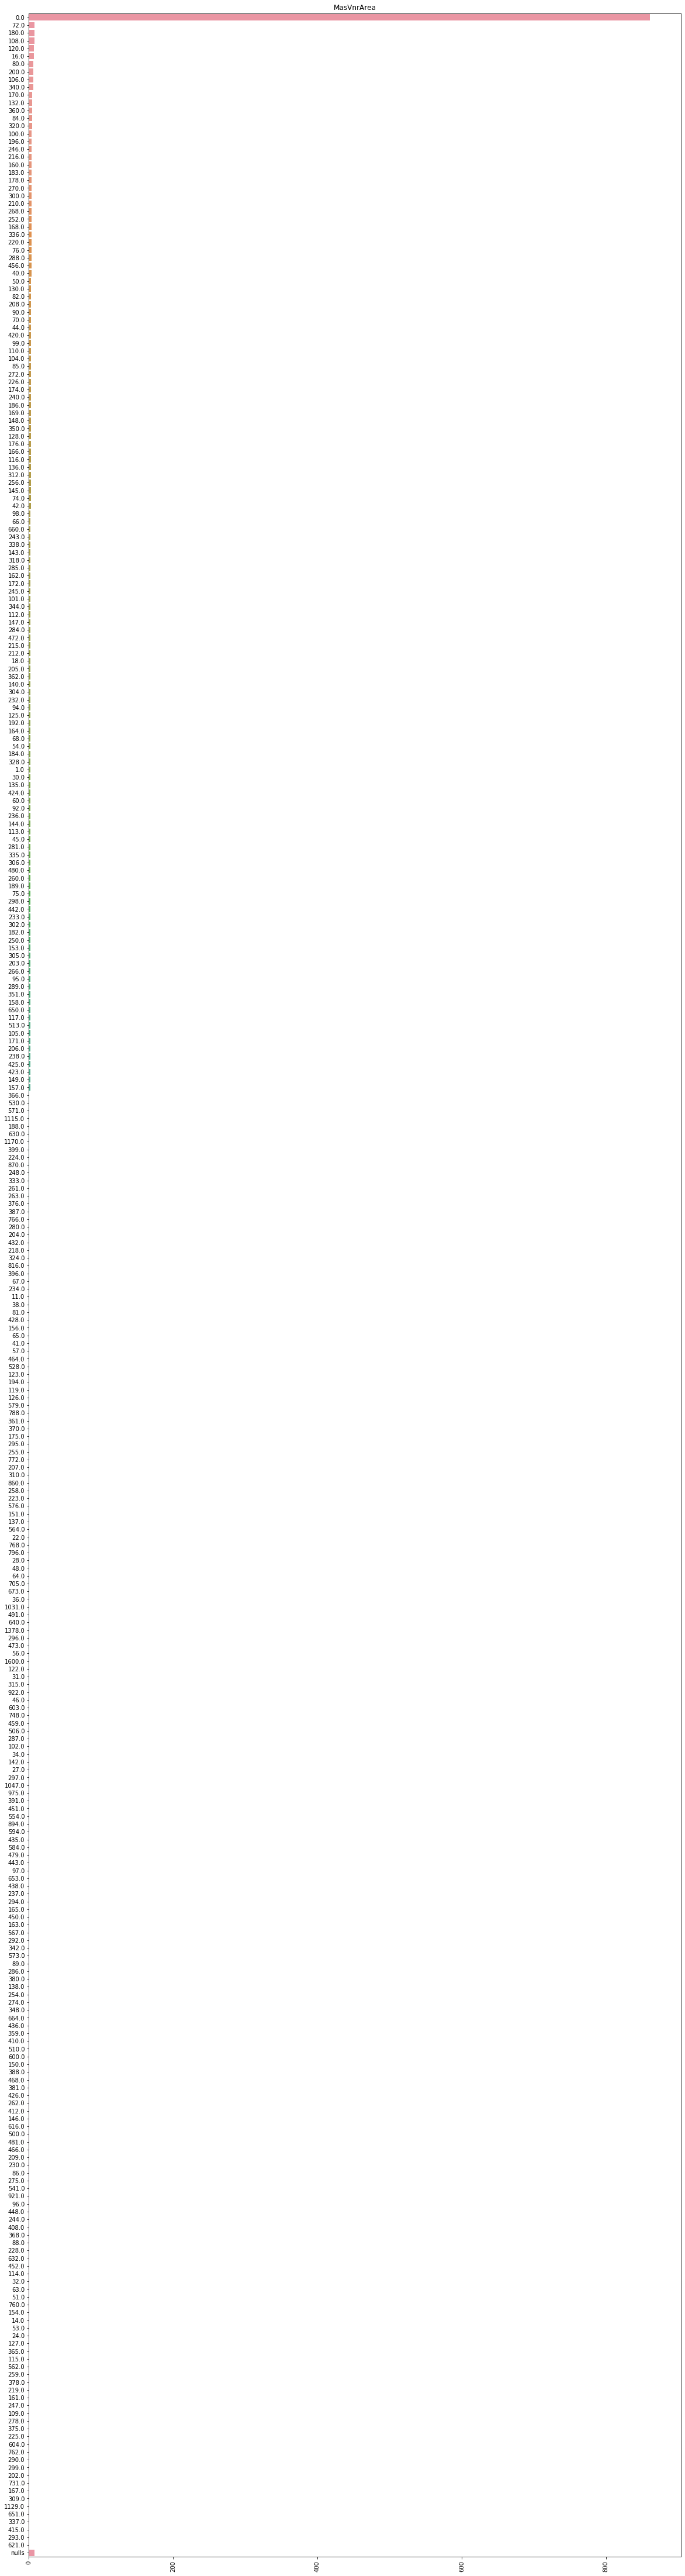

In [867]:
#plot of MasVnrArea
i='MasVnrArea'
plt.figure(figsize=(20,80))
plt.title(i)
count_dict=df[i].value_counts()
x=count_dict.keys()
x=['{}'.format(k) for k in x]
x.append('nulls')
y=list(count_dict.values)
y.append(df[i].isnull().sum())
sns.barplot(x=y,y=x)
plt.xticks(rotation=90)

In [868]:
#Impute with mode
i='MasVnrArea'
v=df[i].mode()
print('Null count before imputation:\t{}'.format(df[i].isnull().sum()))
df[i][df[i].isnull()]=float(df[i].mode())
print('Null count after imputation:\t{}'.format(df[i].isnull().sum()))

Null count before imputation:	8
Null count after imputation:	0


In [869]:
#Verifying if all columns in dataset are imputed
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType         0
GarageFinish       0
GarageCars   

In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotArea          1460 non-null   int64  
 4   LotShape         1460 non-null   object 
 5   LandContour      1460 non-null   object 
 6   LotConfig        1460 non-null   object 
 7   Neighborhood     1460 non-null   object 
 8   Condition1       1460 non-null   object 
 9   BldgType         1460 non-null   object 
 10  HouseStyle       1460 non-null   object 
 11  OverallQual      1460 non-null   int64  
 12  OverallCond      1460 non-null   int64  
 13  RoofStyle        1460 non-null   object 
 14  Exterior1st      1460 non-null   object 
 15  Exterior2nd      1460 non-null   object 
 16  MasVnrType       1460 non-null   object 
 17  MasVnrArea    

### Correlation between various columns

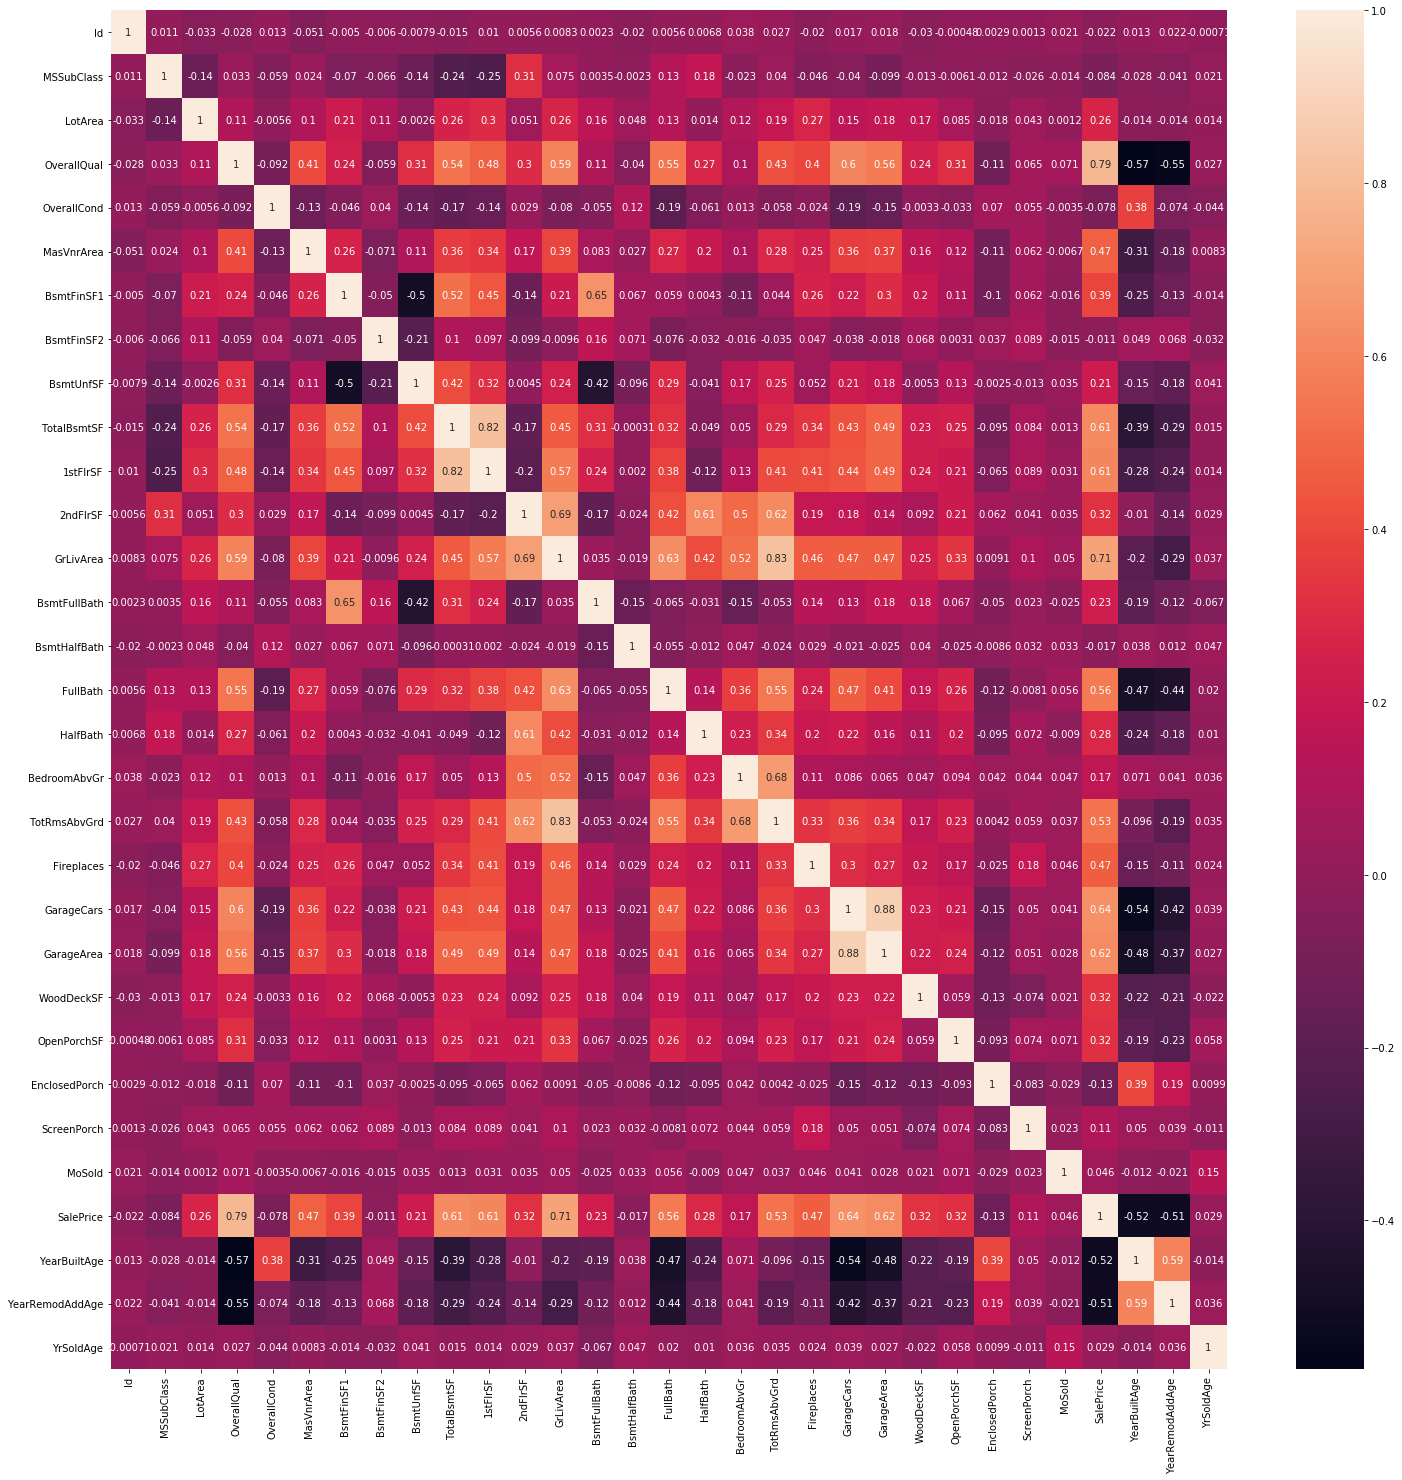

In [871]:
#Heatmap of dataset
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

- Removing Variables with corr 0.70 and above with SalePrice
    - OverallQual
    - GrLiveArea
- There exists high correlation between
     - TotalBsmtSF and 1stFlrSF 
     - GrLivArea and 2ndFlrSF 
     - GrLivArea and TotRmsAbvGrd
     - BedroomAbvGr and TotRmsAbvGrd
     - GarageArea and GarageCars

In [872]:
#Dropping variables highly correlated with SalePrice
df.drop(columns=['OverallQual','GrLivArea'],axis=1,inplace=True)

In [873]:
df.shape

(1460, 61)

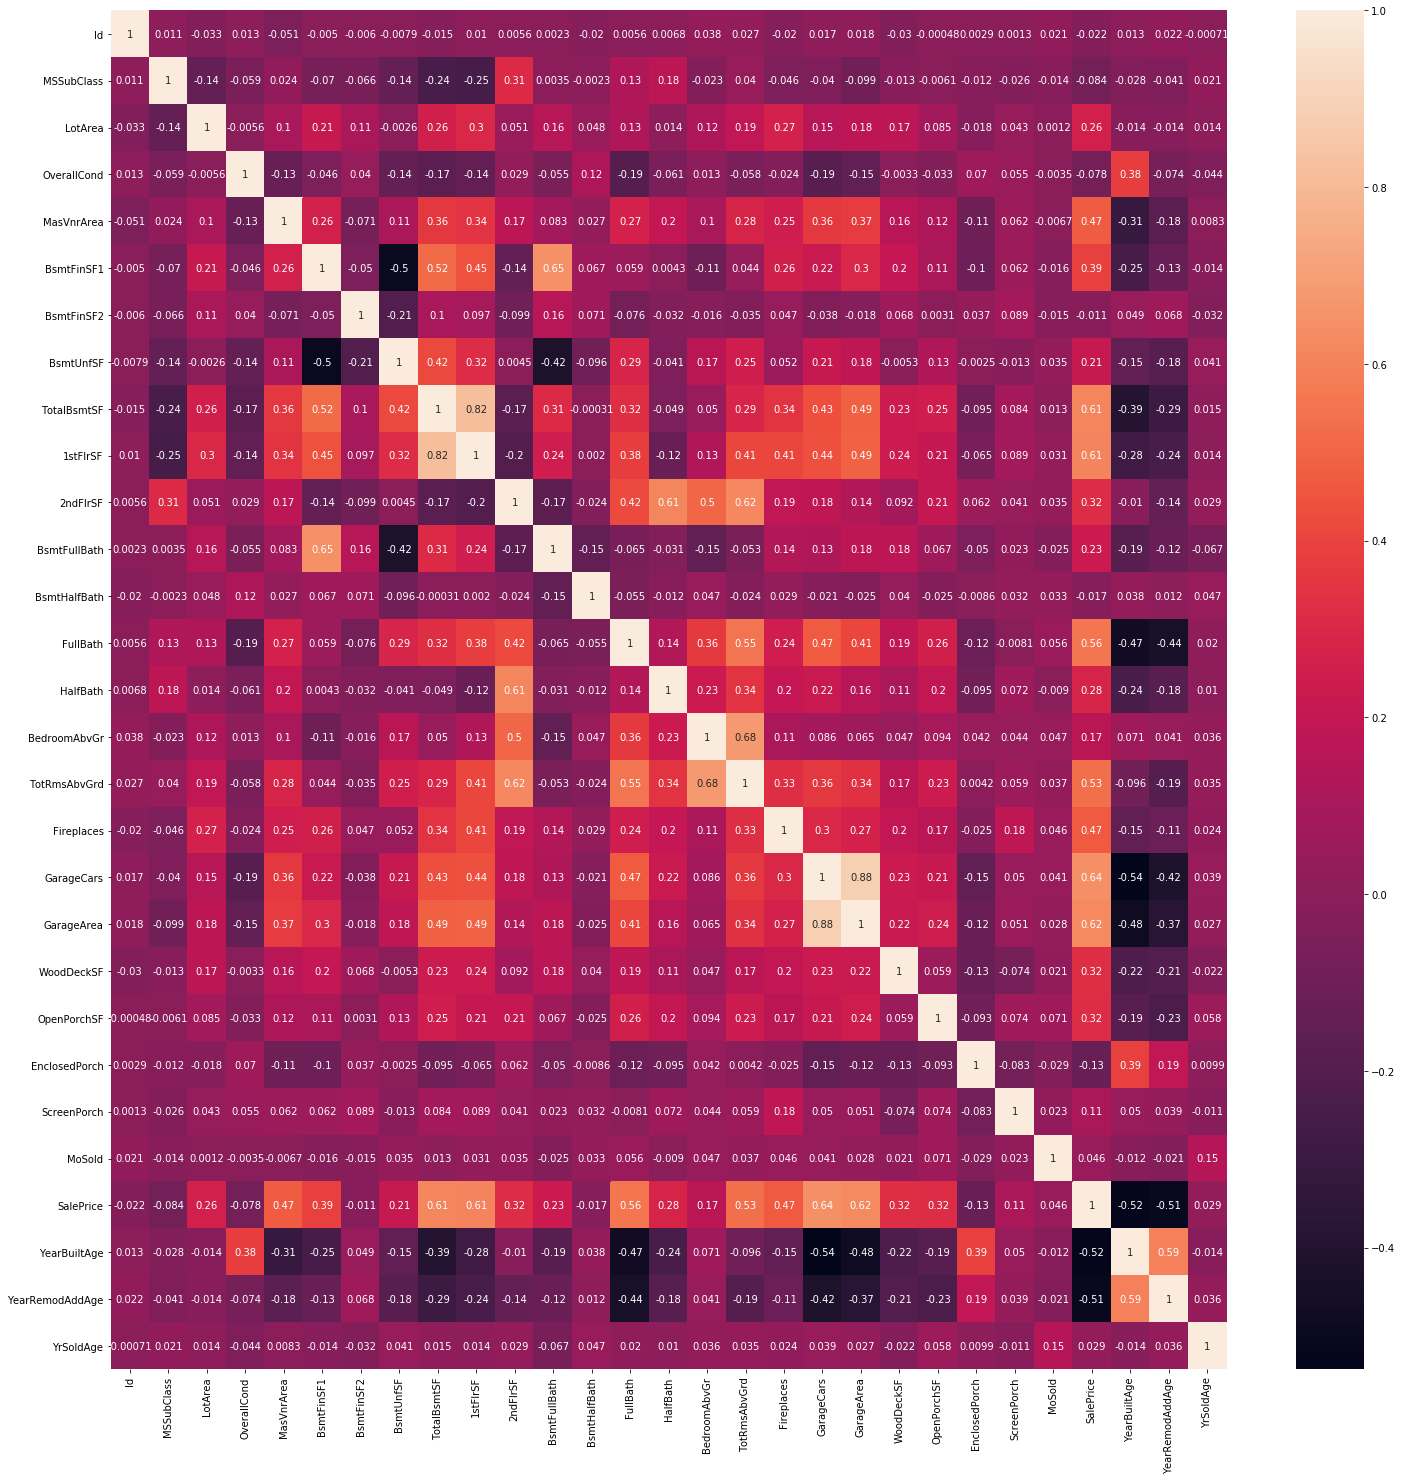

In [874]:
#Heatmap to check correlation again
plt.figure(figsize=(25,25))

sns.heatmap(df.corr(),annot=True)

There exists high correlation between
- TotalBsmtSF and 1stFlrSF 
- BedroomAbvGr and TotRmsAbvGrd
- GarageArea and GarageCars

In [875]:
#Drop highly correlated columns
df.drop(columns=['1stFlrSF','BedroomAbvGr','GarageCars'],inplace=True,axis=1)

In [876]:
df.shape

(1460, 58)

### Outlier Treatment

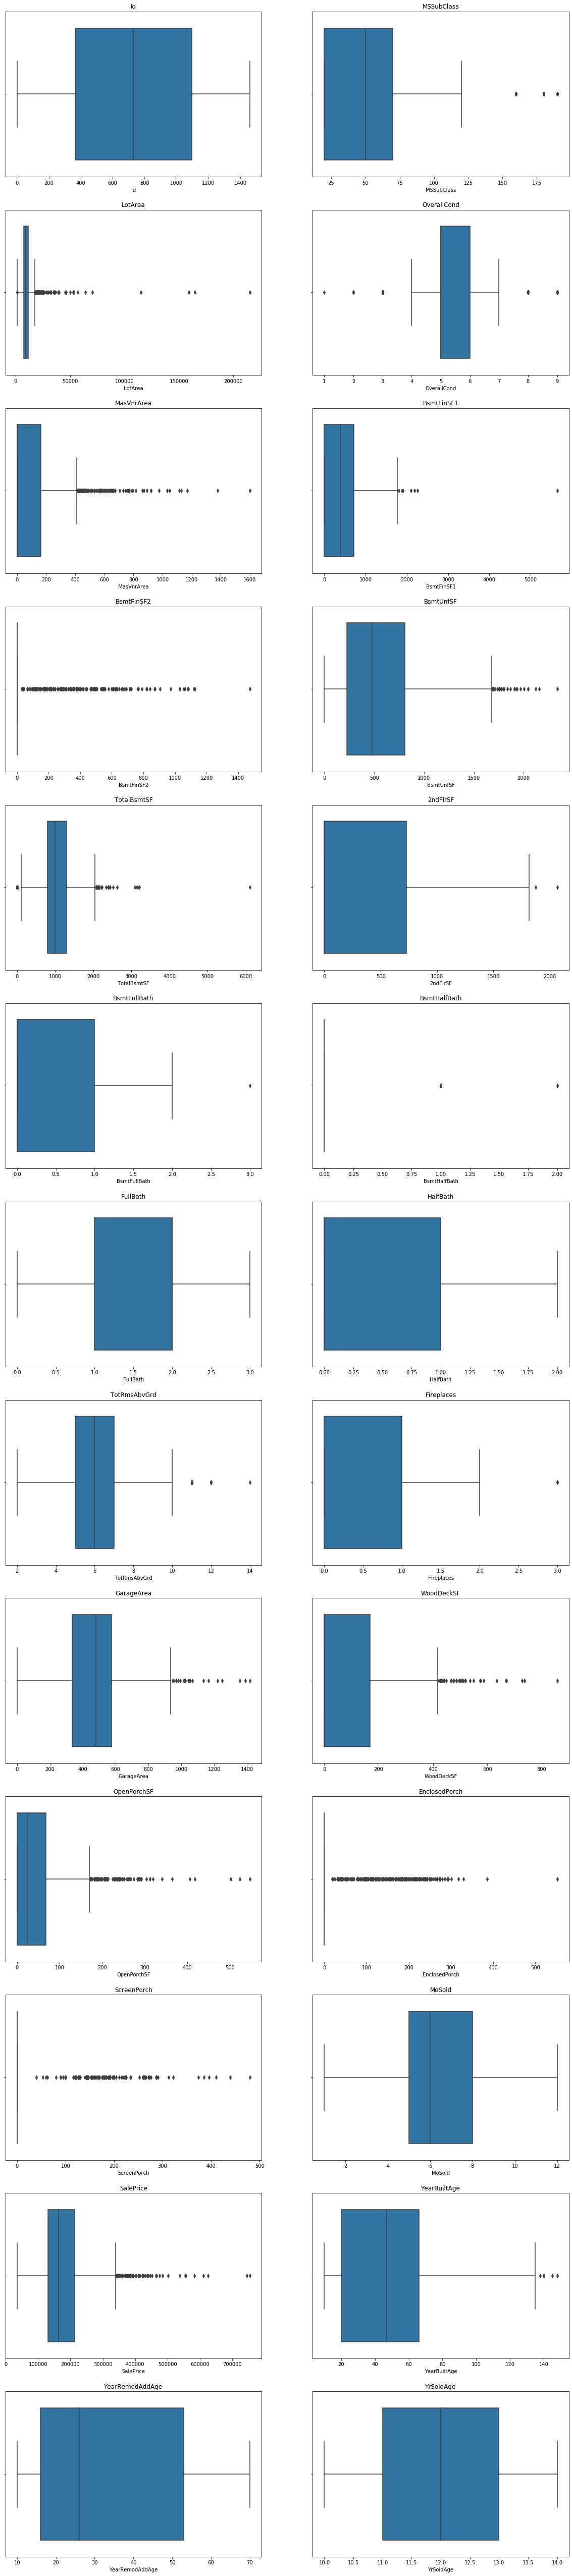

In [877]:
#Look at outliers
plt.figure(figsize=(20,100))
j=1
for i in df.columns:
    
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        
        plt.subplot(26//2+1,2,j)
    #if(df[i].dtype=='float64' or df[i].dtype=='int64'):
        sns.boxplot(x=df[i])
        plt.title(i)
        j=j+1
    
        

##### Observation
Clearly following has outliers, hence capping them
- LotArea >100000
- MasVnrArea >1200
- BsmtFinSF1 >2500
- BsmtFinSF2 >1200
- TotalBsmtSF >4000
- WoodDeckSF >600
- OpenPorchSF >400
- EnclosedPorch >350
- ScreenPorch >350
- SalePrice >600000


In [878]:
#Capping columns
Cap_col=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','ScreenPorch','SalePrice']
Cap_val=[100000,1200,2500,1200,4000,600,400,350,350,600000]

for i in enumerate(Cap_col):
    print(i[1],df[df[i[1]]<Cap_val[i[0]]][i[1]].max())
    df[i[1]]=df[i[1]].apply(lambda x: df[df[i[1]]<Cap_val[i[0]]][i[1]].max() if x>Cap_val[i[0]] else x )

LotArea 70761
MasVnrArea 1170.0
BsmtFinSF1 2260
BsmtFinSF2 1127
TotalBsmtSF 3206
WoodDeckSF 586
OpenPorchSF 364
EnclosedPorch 330
ScreenPorch 322
SalePrice 582933


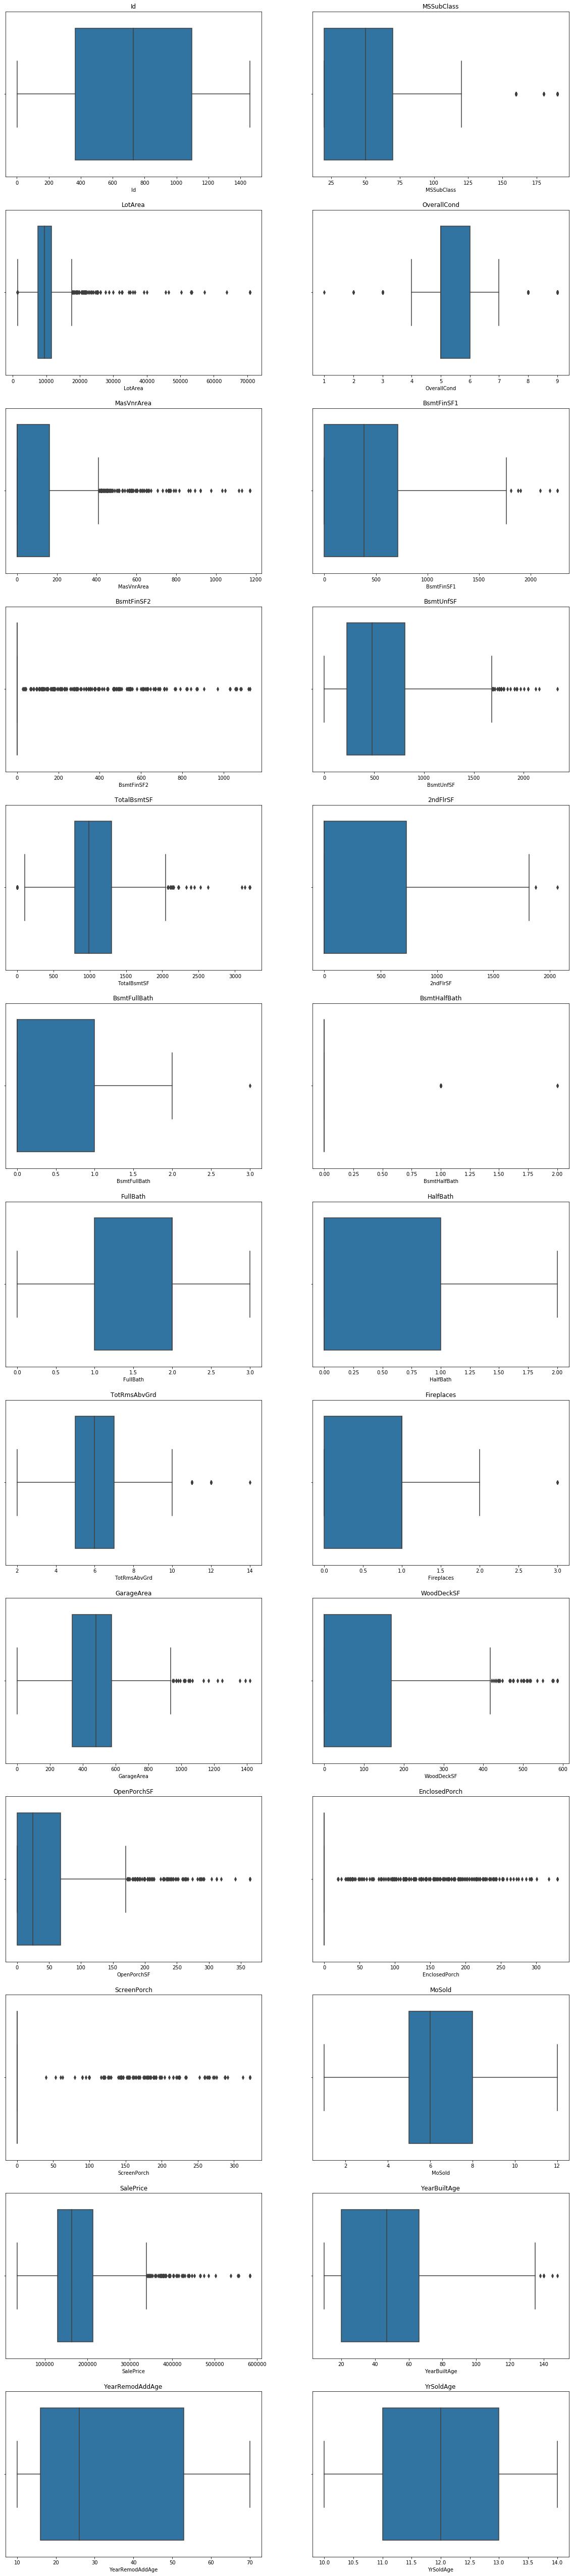

In [879]:
#Verifying after capping
plt.figure(figsize=(20,100))
j=1
for i in df.columns:
    
    if(df[i].dtype=='int64' or df[i].dtype=='float64'):
        
        plt.subplot(26//2+1,2,j)
        sns.boxplot(x=df[i])
        plt.title(i)
        j=j+1
    
plt.savefig('F:/test.png')

In [880]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   int64  
 2   MSZoning         1460 non-null   object 
 3   LotArea          1460 non-null   int64  
 4   LotShape         1460 non-null   object 
 5   LandContour      1460 non-null   object 
 6   LotConfig        1460 non-null   object 
 7   Neighborhood     1460 non-null   object 
 8   Condition1       1460 non-null   object 
 9   BldgType         1460 non-null   object 
 10  HouseStyle       1460 non-null   object 
 11  OverallCond      1460 non-null   int64  
 12  RoofStyle        1460 non-null   object 
 13  Exterior1st      1460 non-null   object 
 14  Exterior2nd      1460 non-null   object 
 15  MasVnrType       1460 non-null   object 
 16  MasVnrArea       1460 non-null   float64
 17  ExterQual     

### Analysis of SalePrice v/s Other columns

#### Numerical columns

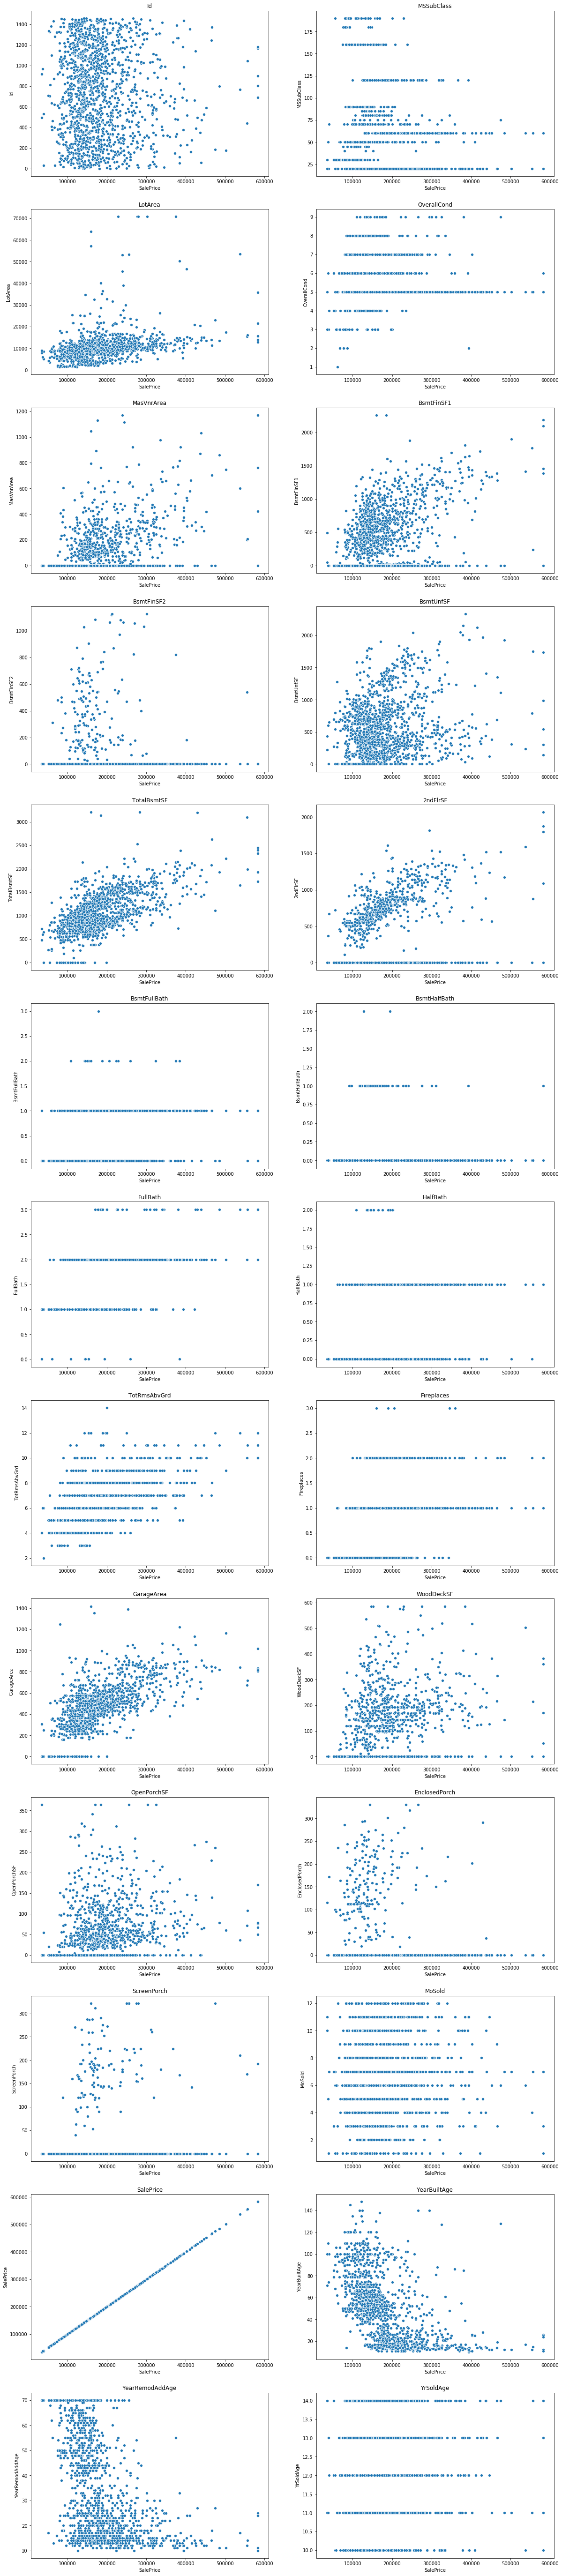

In [881]:
plt.figure(figsize=(20,100))
j=1
#df_cat= df.select_dtypes(include=['object'])
for i in df.columns:
    
    if(df[i].dtype=='float64' or df[i].dtype=='int64'):
        plt.subplot((27//2),2,j)
        sns.scatterplot(x=df['SalePrice'],y=df[i])
        plt.title(i)
        j=j+1

##### Observations
- MSSubClass 60 and 20 fall in higher price category
- OverallCond is 5 for higher price range
- BsmtFinSF1 is higher as it increases
- BsmtFinSF2 is absent for higher price
- TotalBsmtSF is higher with increase in price
- BsmtFullBath is 1 or 0 for higher price
- BsmtHalfBath is 0 for higher price
- FullBath is 2 for higher price
- HalfBath is 1 for higher price
- BedroomAbvGr is 4 or below for higher price
- KitchenAbvGr is 1 for higher price
- TotalRmsAbvGrd is higher for higher price
- Fireplaces is 1 or 2 for higher price
- GarageArea is higher with price
- EnclosedProch is absent for higher price
- ScreenPorch is absent for many for higer price
- YearBuiltAge is less for higher price
- YearRemodAddAge is less for higher price




#### Categorical columns

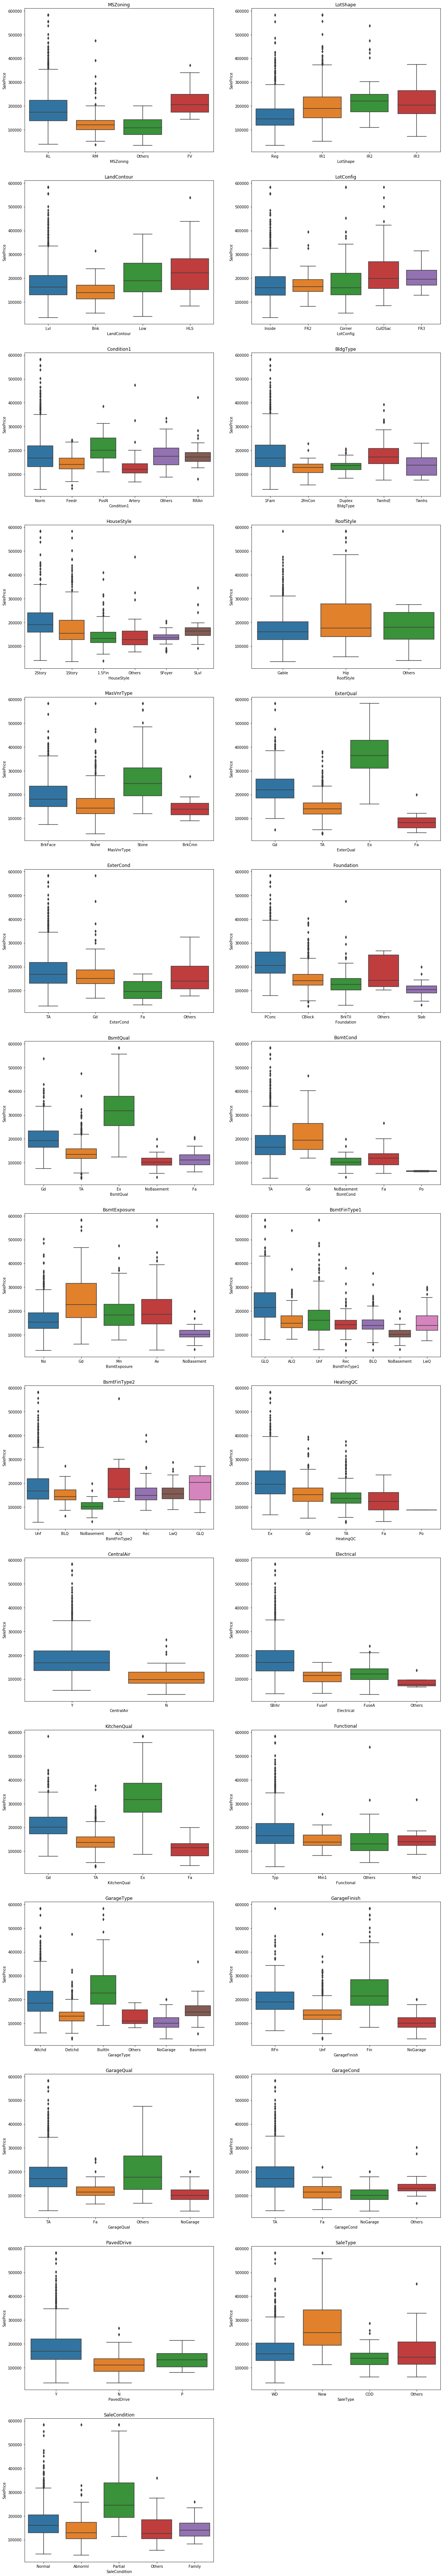

In [882]:
plt.figure(figsize=(20,160))
j=1
for i in df.columns:
    if(df[i].dtype=='object'):
        if(i!='Id' and i!='Exterior1st' and i!='Exterior2nd' and i!='Neighborhood'):
            plt.subplot(36//2+1,2,j)
            sns.boxplot(x=df[i],y=df['SalePrice'])
            plt.title(i)
            j=j+1

- MSZoning as RL has higher price 
- LotShape is IR1 and Reg for higher price
- Landcontour is Lvl for higer price
- LotConfig id CulDSac and Inside for higer price
- Condition1 is Norm for higher price
- BldgType is lFam for higher price
- HouseStyle 2Story and 1Story for higher price
- RoofStyle is Hip for higher price, Others for lower
- MasVnrType is BrkCmn has lower price
- ExterQual is Ex and Gd for higher price and Fa for lower price
- ExterCond is TA has higher price
- Foundation PConc has higher price
- BsmtQual  Ex has higher price and Fa has lower price
- BsmtCond as TA has higher price and as Fa or Po have only lower price
- BsmtExposure as Gd and Av have higher price and No Basement covers lower price
- BsmtFinType1 as GLQ and Unf have higher price and No Basement covers lower price
- BsmtFinType2 as Unf has higher price
- HeatingQC as Ex has higher price
- Central Air as Y has higher price
- Electrical as SBrkr has higher price
- KitchenQual as Ex has higher price and Fa is least
- Functional as Typ has higher price 
- GarageType Attched and Builtin has higher price and without garage has lower price
- GarageFinish as Fin has highest price and without garage has lowest proce
- GarageQual TA has higher price without garage has least
- GarageCond TA has higher price 
- PavedDrive as Y has highest price, N and P has lowest price 
- SaleType as WD and New have higher price
- SaleCondition as Normal and Partial have higher prices

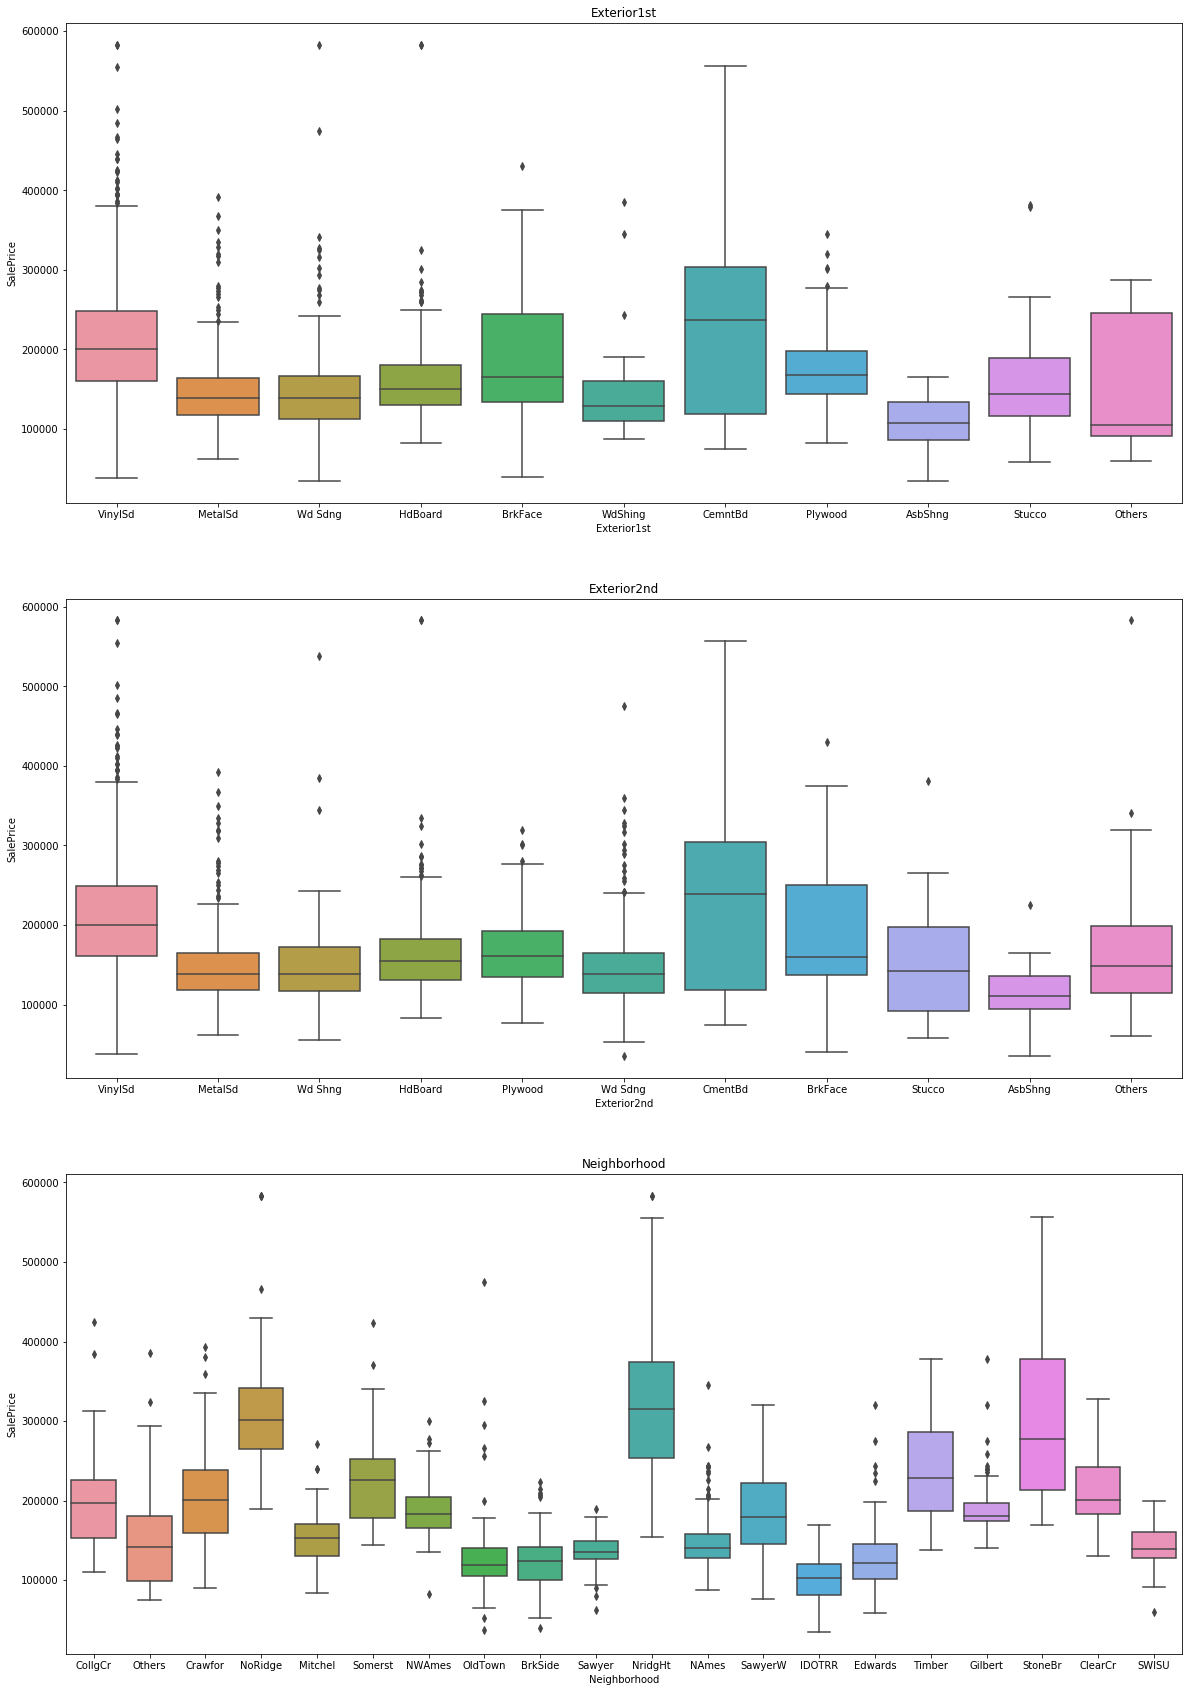

In [883]:
plt.figure(figsize=(20,30))
j=1
for i in ['Exterior1st','Exterior2nd','Neighborhood']:
    if(df[i].dtype!='int64' and df[i].dtype!='float64'):
        #if(i!='Id' and i!='Exterior1st' and i!='Exterior2nd' and i!='Neighborhood'):
        plt.subplot(3,1,j)
        sns.boxplot(x=df[i],y=df['SalePrice'])
        plt.title(i)
        j=j+1

- Exterior1st VinylSd, CemntBd occupy higher price
- Exterior2nd VinylSd, CemntBd occupy higher price
- Neighborhood NridgHt and StoneBr occupy higher price

# Verify target variable is normal

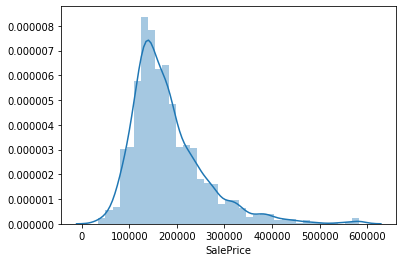

In [884]:
sns.distplot(df['SalePrice'])



In [885]:
print('Skewness for SalePrice:',skew(df['SalePrice']))

Skewness for SalePrice: 1.613033615025326


##### Observation
- Indicates that data is skewed(>0.5)
- From graph we observe data is skewed to the left
- To make it normal and symmetric, SalePrice is converted to its log

In [886]:
#Taking log of SalePrice
SalePrice_Orig=df['SalePrice']
df['SalePrice']=np.log(df['SalePrice'])

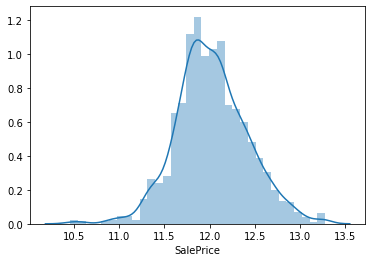

In [887]:
#Verifying data distribution of log 
sns.distplot(df['SalePrice'])

In [888]:
print('Skewness for SalePrice:',skew(df['SalePrice']))

Skewness for SalePrice: 0.08813227085295837


##### Observation
- Indicates that skewness is closer to 0, data is symmetric
- Graph also indicates the same, data is centred around 12

# Data Preparation

In [889]:
df_cat= df.select_dtypes(include=['object'])
df_cat.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Others,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [890]:
# convert into dummies
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarage,GarageQual_Others,GarageQual_TA,GarageCond_NoGarage,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0


In [891]:
# drop categorical variables 
df = df.drop(list(df_cat.columns), axis=1)

In [892]:
# concat dummy variables with X
df = pd.concat([df, df_dummies], axis=1)

In [893]:
df.shape

(1460, 168)

In [894]:
#Find list of columns with 95% or more data same
drop_list=[]
for i in df.columns:
    if(i!='Id'):
        #print(list(df[i].value_counts())[0])
        if((round(list(df[i].value_counts())[0]/len(df)*100),2)[0]>=95):
            drop_list.append(i)
print(drop_list)

['MSZoning_Others', 'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Others', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Others', 'Condition1_PosN', 'Condition1_RRAn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_Others', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Others', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Others', 'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Others', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterCond_Others', 'Foundation_Others', 'Foundation_Slab', 'BsmtQual_Fa', 'BsmtQual_NoBasement', 'BsmtCond_G

In [895]:
#Drop columns identified in above step
df.drop(columns=drop_list,inplace=True)
df.shape

(1460, 95)

In [896]:
#Dropping ID column as it is not required 
df_ID=df['Id']
df=df.drop(columns=['Id'],axis=1)

In [897]:
df.shape

(1460, 94)

In [898]:
#Splittling into y and X
y=df.pop('SalePrice')
X=df

In [899]:
# scaling the features


# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'YearBuiltAge', 'YearRemodAddAge', 'YrSoldAge',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_OldTown',
       'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood',
       'Exterior2nd_VinylSd', 'Exterior2nd_

In [900]:
X.head()

,MSSubClass,LotArea,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YearBuiltAge,YearRemodAddAge,YrSoldAge,MSZoning_RL,MSZoning_RM,LotShape_Reg,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_NoGarage,GarageQual_TA,GarageCond_NoGarage,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.280192,-0.517200,0.525360,0.604650,-0.290528,-0.944591,-0.472715,1.161852,1.107810,-0.241061,0.789741,1.227585,0.912210,-0.951226,0.351000,-0.763017,0.230679,-0.363753,-0.275806,-1.599111,-1.050994,-0.878668,-0.138777,0.518133,-0.418955,0.760512,0.337126,-0.262324,0.622762,2.955221,-0.271163,-0.426833,-0.289638,-0.250182,-0.242360,0.39841,-0.291025,-0.994535,1.510265,-0.49357,-0.423464,-0.421212,-0.282633,1.354604,-0.405308,-0.406452,-0.414427,-0.328236,1.377253,-0.39494,1.510265,-1.217782,-0.309994,1.411313,-1.278819,-0.333333,0.37262,-0.876102,1.120968,1.167244,-0.894565,0.337126,-0.317893,-0.291025,0.728285,-0.335864,1.578868,-0.316585,-0.646124,0.401865,-0.444638,-0.643994,0.263813,0.305995,1.221257,-1.006873,0.271163,-0.253259,-0.600559,-0.24236,-0.24236,1.568348,-0.841191,-0.24236,0.337126,-0.24236,0.317893,0.299253,-0.301962,0.390293,0.467651,-0.305995
1,-0.872563,-0.102436,2.179628,-0.578055,1.226027,-0.290528,-0.641228,0.489589,-0.795163,-0.819964,3.948809,0.789741,-0.761621,-0.318683,0.600495,-0.060731,1.663353,-0.724336,-0.363753,-0.275806,-0.489110,-0.156734,0.429577,0.614439,0.518133,-0.418955,0.760512,0.337126,-0.262324,-1.605749,-0.338384,-0.271163,-0.426833,-0.289638,-0.250182,4.126099,-2.50998,-0.291025,1.005495,-0.662136,-0.49357,-0.423464,2.374103,-0.282633,-0.738223,-0.405308,-0.406452,2.412971,-0.328236,-0.726083,-0.39494,-0.662136,0.821165,-0.309994,-0.708560,0.781971,-0.333333,0.37262,1.141420,-0.892086,1.167244,-0.894565,0.337126,3.145715,-0.291025,-1.373090,-0.335864,-0.633365,-0.316585,-0.646124,0.401865,-0.444638,-0.643994,0.263813,0.305995,-0.818829,0.993174,0.271163,-0.253259,-0.600559,-0.24236,-0.24236,1.568348,-0.841191,-0.24236,0.337126,-0.24236,0.317893,0.299253,-0.301962,0.390293,0.467651,-0.305995
2,0.073375,0.152606,-0.517200,0.333951,0.102066,-0.290528,-0.301643,-0.321022,1.189351,1.107810,-0.241061,0.789741,1.227585,-0.318683,0.600495,0.631726,-0.763017,-0.066785,-0.363753,-0.275806,0.990891,-0.984752,-0.830215,-0.138777,0.518133,-0.418955,-1.314904,0.337126,-0.262324,0.622762,2.955221,-0.271163,-0.426833,-0.289638,-0.250182,-0.242360,0.39841,-0.291025,-0.994535,1.510265,-0.49357,-0.423464,-0.421212,-0.282633,1.354604,-0.405308,-0.406452,-0.414427,-0.328236,1.377253,-0.39494,1.510265,-1.217782,-0.309994,1.411313,-1.278819,-0.333333,0.37262,-0.876102,1.120968,1.167244,-0.894565,0.337126,-0.317893,3.436134,-1.373090,-0.335864,1.578868,-0.316585,-0.646124,0.401865,-0.444638,-0.643994,0.263813,0.305995,1.221257,-1.006873,0.271163,-0.253259,-0.600559,-0.24236,-0.24236,1.568348,

In [901]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Ridge Regression

In [902]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [903]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=4000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005184,0.000400,0.001795,0.000399,0.0001,{'alpha': 0.0001},-0.101558,-0.108875,-0.109083,-0.091601,-0.102007,-0.102625,0.006385,1,-0.089998,-0.086638,-0.085411,-0.091023,-0.090979,-0.088810,0.002336
1,0.006585,0.001352,0.002192,0.000399,0.001,{'alpha': 0.001},-0.101557,-0.108875,-0.109088,-0.091600,-0.102013,-0.102627,0.006386,2,-0.090001,-0.086638,-0.085412,-0.091025,-0.090983,-0.088812,0.002337
2,0.005790,0.000971,0.002189,0.000393,0.01,{'alpha': 0.01},-0.101551,-0.108876,-0.109144,-0.091597,-0.102071,-0.102648,0.006397,3,-0.090033,-0.086637,-0.085427,-0.091054,-0.091019,-0.088834,0.002348
3,0.004593,0.000491,0.001192,0.000401,0.05,{'alpha': 0.05},-0.101525,-0.108879,-0.109373,-0.091587,-0.102304,-0.102734,0.006446,4,-0.090165,-0.086636,-0.085500,-0.091176,-0.091176,-0.088931,0.002393
4,0.004788,0.000746,0.001395,0.000489,0.1,{'alpha': 0.1},-0.101529,-0.108882,-0.109628,-0.091577,-0.102556,-0.102834,0.006500,5,-0.090311,-0.086635,-0.085593,-0.091320,-0.091354,-0.089043,0.002443
5,0.004389,0.000488,0.001794,0.000399,0.2,{'alpha': 0.2},-0.101550,-0.108890,-0.110056,-0.091555,-0.102952,-0.103001,0.006597,7,-0.090579,-0.086633,-0.085777,-0.091560,-0.091639,-0.089237,0.002519
6,0.004987,0.000892,0.001597,0.000487,0.3,{'alpha': 0.3},-0.101596,-0.108897,-0.110397,-0.091532,-0.103246,-0.103133,0.006677,9,-0.090802,-0.086632,-0.085938,-0.091748,-0.091859,-0.089396,0.002576
7,0.006983,0.002521,0.002193,0.000748,0.4,{'alpha': 0.4},-0.101631,-0.108904,-0.110678,-0.091508,-0.103471,-0.103239,0.006748,10,-0.090979,-0.086631,-0.086103,-0.091912,-0.092031,-0.089531,0.002614
8,0.005583,0.001016,0.002593,0.001197,0.5,{'alpha': 0.5},-0.101658,-0.108911,-0.110910,-0.091516,-0.103660,-0.103331,0.006798,11,-0.091132,-0.086631,-0.086249,-0.092050,-0.092173,-0.089647,0.002646
9,0.007383,0.002929,0.001593,0.000487,0.6,{'alpha': 0.6},-0.101679,-0.108918,-0.111117,-0.091526,-0.103813,-0.103410,0.006843,12,-0.091263,-0.086630,-0.086371,-0.092168,-0.092295,-0.089746,0.002675


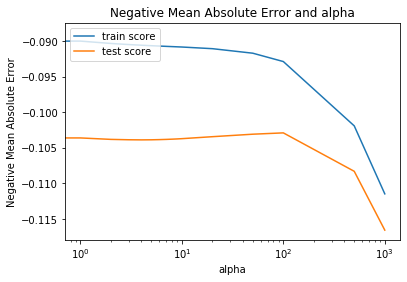

In [904]:
#plt.figure(figsize=(20,8))
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### Observation
- alpha=100 looks like a good value
- Error is highly soping towards negative after that

In [905]:
#Creating model with alpha =100
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#list(ridge.coef_)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [906]:
# predict and get r2_score
y_train_pred = ridge.predict(X_train)
print('Train R2_score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = ridge.predict(X_test)
print('Test R2_score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2_score: 0.8794450594669463
Test R2_score: 0.8636388080610353


In [907]:
#Storing coefficient to dictionary
coeff=list(ridge.coef_)
col=list(X.columns)
comb={}
for i in enumerate(col):
    comb[i[1]]=coeff[i[0]]

In [908]:
#Sorting based on dictionary values
comb1={k: v for k, v in sorted(comb.items(), key=lambda dict_key: abs(dict_key[1]),reverse=True)}

In [909]:
#Top 20 variables in model
for i in enumerate(comb1.keys()):
    if(i[0]<20):
        print('{}: {}'.format(i[1],round(comb[i[1]],3)))

TotalBsmtSF: 0.06
2ndFlrSF: 0.053
TotRmsAbvGrd: 0.052
OverallCond: 0.046
BsmtFinSF1: 0.04
GarageArea: 0.038
Fireplaces: 0.038
FullBath: 0.031
Neighborhood_Edwards: -0.029
BsmtUnfSF: 0.028
YearRemodAddAge: -0.028
BsmtQual_TA: -0.027
MSZoning_RL: 0.026
MSSubClass: -0.024
KitchenQual_TA: -0.024
Neighborhood_Somerst: 0.022
Condition1_Norm: 0.02
BsmtQual_Gd: -0.02
SaleCondition_Normal: 0.019
BsmtExposure_Gd: 0.019


#### Model with double of alpha

In [910]:
#Creating model by doubling alpha
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [911]:
# predict and get r2_score
y_train_pred = ridge.predict(X_train)
print('Train R2_score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = ridge.predict(X_test)
print('Test R2_score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2_score: 0.8750032850777985
Test R2_score: 0.8601423722120343


In [912]:
#Storing coefficients to dictionary
coeff=list(ridge.coef_)
col=list(X.columns)
comb={}
for i in enumerate(col):
    comb[i[1]]=coeff[i[0]]

In [913]:
#Sorting the dictonary based on values
comb2={k: v for k, v in sorted(comb.items(), key=lambda dict_key: abs(dict_key[1]),reverse=True)}
#List first 20 pridctor variables
for i in enumerate(comb2.keys()):
    if(i[0]<20):
        print('{}: {}'.format(i[1],round(comb[i[1]],3)))

TotalBsmtSF: 0.057
TotRmsAbvGrd: 0.05
2ndFlrSF: 0.042
OverallCond: 0.041
Fireplaces: 0.037
GarageArea: 0.037
BsmtFinSF1: 0.034
FullBath: 0.032
YearRemodAddAge: -0.027
Neighborhood_Edwards: -0.026
BsmtUnfSF: 0.024
KitchenQual_TA: -0.021
BsmtQual_TA: -0.021
MSZoning_RL: 0.021
MSSubClass: -0.021
CentralAir_Y: 0.019
BsmtExposure_Gd: 0.019
HalfBath: 0.018
Neighborhood_Somerst: 0.017
Condition1_Norm: 0.017


In [914]:
#Difference in predictor variables in both models
l1=[]
for i in enumerate(comb1.keys()):
    if(i[0]<100):
        l1.append((i[1],round(abs(comb1[i[1]]-comb2[i[1]]),3),comb1[i[1]],comb2[i[1]]))
        if(len(i[1])<14):
            print('{}: \t\t\t{}\t{}\t{}'.format(i[1],round(abs(comb1[i[1]]-comb2[i[1]]),3),round(comb1[i[1]],3),round(comb2[i[1]],3)))
        else:
            print('{}: \t\t{}\t{}\t{}'.format(i[1],round(abs(comb1[i[1]]-comb2[i[1]]),3),round(comb1[i[1]],3),round(comb2[i[1]],3)))

TotalBsmtSF: 			0.003	0.06	0.057
2ndFlrSF: 			0.011	0.053	0.042
TotRmsAbvGrd: 			0.001	0.052	0.05
OverallCond: 			0.006	0.046	0.041
BsmtFinSF1: 			0.005	0.04	0.034
GarageArea: 			0.001	0.038	0.037
Fireplaces: 			0.0	0.038	0.037
FullBath: 			0.0	0.031	0.032
Neighborhood_Edwards: 		0.003	-0.029	-0.026
BsmtUnfSF: 			0.004	0.028	0.024
YearRemodAddAge: 		0.001	-0.028	-0.027
BsmtQual_TA: 			0.005	-0.027	-0.021
MSZoning_RL: 			0.005	0.026	0.021
MSSubClass: 			0.004	-0.024	-0.021
KitchenQual_TA: 		0.003	-0.024	-0.021
Neighborhood_Somerst: 		0.004	0.022	0.017
Condition1_Norm: 		0.003	0.02	0.017
BsmtQual_Gd: 			0.005	-0.02	-0.014
SaleCondition_Normal: 		0.003	0.019	0.017
BsmtExposure_Gd: 		0.0	0.019	0.019
CentralAir_Y: 			0.0	0.019	0.019
HalfBath: 			0.001	0.017	0.018
YearBuiltAge: 			0.003	-0.016	-0.013
BsmtFullBath: 			0.0	0.015	0.014
GarageCond_TA: 			0.002	0.015	0.013
Exterior1st_HdBoard: 		0.004	-0.014	-0.01
ExterQual_Gd: 			0.002	0.014	0.012
BsmtFinSF2: 			0.002	0.014	0.012
BsmtFinType1_GL

In [915]:
#Top 5 high difference predictor variables
sorted(l1, key=lambda x: x[1],reverse=True) [:5]

[('2ndFlrSF', 0.011, 0.05326208770870711, 0.0420465033976133),
 ('OverallCond', 0.006, 0.04640061708752241, 0.040553932102512576),
 ('BsmtFinSF1', 0.005, 0.039575623971746986, 0.03424347307680365),
 ('BsmtQual_TA', 0.005, -0.026910236696504553, -0.021458411049421706),
 ('MSZoning_RL', 0.005, 0.02603903133449737, 0.021014596621748177)]

# Lasso Regression

In [916]:
#Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [917]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096252,0.013991,0.002387,0.000795,0.0001,{'alpha': 0.0001},-0.101452,-0.108937,-0.110365,-0.091034,-0.103280,-0.103014,0.006858,2,-0.090931,-0.086653,-0.085970,-0.091841,-0.092032,-0.089485,0.002627
1,0.030318,0.018047,0.001795,0.000399,0.001,{'alpha': 0.001},-0.099394,-0.108708,-0.111584,-0.089788,-0.104672,-0.102829,0.007700,1,-0.093416,-0.087221,-0.087819,-0.094221,-0.093426,-0.091221,0.003041
2,0.006782,0.001934,0.001197,0.000398,0.01,{'alpha': 0.01},-0.096084,-0.113549,-0.118241,-0.092899,-0.108789,-0.105913,0.009844,3,-0.102433,-0.095916,-0.096788,-0.102694,-0.101542,-0.099875,0.002915
3,0.004187,0.000978,0.001197,0.000399,0.05,{'alpha': 0.05},-0.128963,-0.143964,-0.147418,-0.127296,-0.142222,-0.137973,0.008226,4,-0.137884,-0.132519,-0.132643,-0.137109,-0.137475,-0.135526,0.002417
4,0.006383,0.002862,0.001397,0.000489,0.1,{'alpha': 0.1},-0.176443,-0.183333,-0.182270,-0.165009,-0.182901,-0.177991,0.006955,5,-0.177121,-0.172408,-0.175042,-0.176429,-0.178386,-0.175877,0.002043


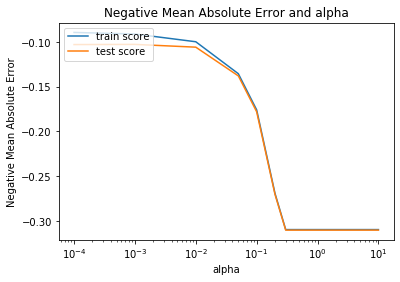

In [918]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### Observation
- Alpha=0.001 looks like a good value
- Error is sloping highly towards negatuve after that

In [919]:
#Creating model with alpha=0.001
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [920]:
# predict and get r2_score
y_train_pred = lasso.predict(X_train)
print('Train R2_score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lasso.predict(X_test)
print('Test R2_score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2_score: 0.8824978141862407
Test R2_score: 0.864040349670975


In [921]:
#Storing coefficient to dictionary
coeff=list(lasso.coef_)
col=list(X.columns)
comb={}
for i in enumerate(col):
    comb[i[1]]=round(coeff[i[0]],4)

In [922]:
#Sorting the dictonary
comb3={k: v for k, v in sorted(comb.items(), key=lambda dict_key: abs(dict_key[1]),reverse=True)}
#comb3=comb1.copy()

In [923]:
#List first 20 predictor variables
for i in enumerate(comb3.keys()):
    if(i[0]<20):
        print('{}: {}'.format(i[1],comb3[i[1]]))

BsmtFinSF1: 0.0938
2ndFlrSF: 0.0798
BsmtUnfSF: 0.0788
OverallCond: 0.0533
TotRmsAbvGrd: 0.0498
GarageArea: 0.0402
Fireplaces: 0.0393
BsmtQual_TA: -0.0364
MSZoning_RL: 0.0358
BsmtFinSF2: 0.0314
Neighborhood_Edwards: -0.0307
Neighborhood_Somerst: 0.0285
BsmtQual_Gd: -0.0277
YearRemodAddAge: -0.0276
YearBuiltAge: -0.0269
MSSubClass: -0.0266
FullBath: 0.0251
KitchenQual_TA: -0.0248
TotalBsmtSF: 0.0235
Condition1_Norm: 0.0231


In [924]:
#Number of non-zero coefficients
len(comb3)-list(comb3.values()).count(0)

76

#### Regression with double alpha,i.e, alpha= 0.002

In [925]:
#Creating model with double alpha
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [926]:
# predict and get r2_score
y_train_pred = lasso.predict(X_train)
print('Train R2_score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lasso.predict(X_test)
print('Test R2_score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2_score: 0.8788714196958921
Test R2_score: 0.861584786569287


In [927]:
#Storing coefficients in dictionary
coeff=list(lasso.coef_)
col=list(X.columns)
comb={}
for i in enumerate(col):
    comb[i[1]]=round(coeff[i[0]],4)

In [928]:
#Sort dictionary in reverse order of values
comb2={k: v for k, v in sorted(comb.items(), key=lambda dict_key: abs(dict_key[1]),reverse=True)}

In [929]:
#Print top 20 variables
for i in enumerate(comb2.keys()):
    if(i[0]<20):
        print('{}: {}'.format(i[1],comb2[i[1]]))

TotalBsmtSF: 0.0998
2ndFlrSF: 0.0729
OverallCond: 0.0516
TotRmsAbvGrd: 0.05
GarageArea: 0.0423
Fireplaces: 0.0414
BsmtQual_TA: -0.0342
MSZoning_RL: 0.0338
Neighborhood_Edwards: -0.0285
YearRemodAddAge: -0.0276
Neighborhood_Somerst: 0.0272
YearBuiltAge: -0.0253
FullBath: 0.0249
BsmtQual_Gd: -0.0243
MSSubClass: -0.023
Condition1_Norm: 0.0218
KitchenQual_TA: -0.0198
GarageCond_TA: 0.0185
BsmtExposure_Gd: 0.0181
CentralAir_Y: 0.0176


In [930]:
#Number of non-zero coefficients
len(comb2)-list(comb2.values()).count(0)


69

In [931]:
#Difference between predictor variables in both the models
l2=[]
print('Column_Name:\t\t\tDiff\tC1\tC2')
print('************\t\t\t****\t**\t**')
for i in enumerate(comb3.keys()):
    if(i[0]<100):
        l2.append((i[1],round(abs(comb3[i[1]]-comb2[i[1]]),3),comb3[i[1]],comb2[i[1]]))
        if(len(i[1])<14):
            print('{}: \t\t\t{}\t{}\t{}'.format(i[1],round(abs(comb3[i[1]]-comb2[i[1]]),3),comb3[i[1]],comb2[i[1]]))
        else:
            print('{}: \t\t{}\t{}\t{}'.format(i[1],round(abs(comb3[i[1]]-comb2[i[1]]),3),comb3[i[1]],comb2[i[1]]))

Column_Name:			Diff	C1	C2
************			****	**	**
BsmtFinSF1: 			0.079	0.0938	0.0151
2ndFlrSF: 			0.007	0.0798	0.0729
BsmtUnfSF: 			0.079	0.0788	0.0
OverallCond: 			0.002	0.0533	0.0516
TotRmsAbvGrd: 			0.0	0.0498	0.05
GarageArea: 			0.002	0.0402	0.0423
Fireplaces: 			0.002	0.0393	0.0414
BsmtQual_TA: 			0.002	-0.0364	-0.0342
MSZoning_RL: 			0.002	0.0358	0.0338
BsmtFinSF2: 			0.03	0.0314	0.0016
Neighborhood_Edwards: 		0.002	-0.0307	-0.0285
Neighborhood_Somerst: 		0.001	0.0285	0.0272
BsmtQual_Gd: 			0.003	-0.0277	-0.0243
YearRemodAddAge: 		0.0	-0.0276	-0.0276
YearBuiltAge: 			0.002	-0.0269	-0.0253
MSSubClass: 			0.004	-0.0266	-0.023
FullBath: 			0.0	0.0251	0.0249
KitchenQual_TA: 		0.005	-0.0248	-0.0198
TotalBsmtSF: 			0.076	0.0235	0.0998
Condition1_Norm: 		0.001	0.0231	0.0218
SaleCondition_Normal: 		0.003	0.0202	0.017
BsmtExposure_Gd: 		0.001	0.0191	0.0181
GarageCond_TA: 			0.0	0.0184	0.0185
ExterQual_Gd: 			0.001	0.0177	0.0168
CentralAir_Y: 			0.0	0.0173	0.0176
SaleType_New: 			0.0	0.0

In [932]:
#Sorted list to fetch top 5 variables
sorted(l2, key=lambda x: x[1],reverse=True) [:5]

[('BsmtFinSF1', 0.079, 0.0938, 0.0151),
 ('BsmtUnfSF', 0.079, 0.0788, 0.0),
 ('TotalBsmtSF', 0.076, 0.0235, 0.0998),
 ('BsmtFinSF2', 0.03, 0.0314, 0.0016),
 ('2ndFlrSF', 0.007, 0.0798, 0.0729)]

### Predicting top 5 variables with top 5 varaibles in previous lasso model not available

In [933]:
#Dropping top 5 predictors in alpha=0.001
X_train1=X_train.drop(columns=['BsmtFinSF1','2ndFlrSF','BsmtUnfSF','TotRmsAbvGrd','OverallCond'],axis=1)
X_test1=X_test.drop(columns=['BsmtFinSF1','2ndFlrSF','BsmtUnfSF','TotRmsAbvGrd','OverallCond'],axis=1)

In [934]:
#Build model
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [935]:
# predict and get r2_score
y_train_pred = lasso.predict(X_train1)
print('Train R2_score: {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
y_test_pred = lasso.predict(X_test1)
print('Test R2_score: {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

Train R2_score: 0.8553011462447653
Test R2_score: 0.8331608648006281


In [936]:
#Storing coefficients to dictionary
coeff=list(lasso.coef_)
col=list(X_train1.columns)
comb={}
for i in enumerate(col):
    comb[i[1]]=round(coeff[i[0]],4)

In [937]:
#Sort the dictionary based on values
comb4={k: v for k, v in sorted(comb.items(), key=lambda dict_key: abs(dict_key[1]),reverse=True)}

In [938]:
#list top 20 predictor variables
for i in enumerate(comb4.keys()):
    if(i[0]<20):
        print('{}: {}'.format(i[1],comb4[i[1]]))


TotalBsmtSF: 0.1112
FullBath: 0.0633
YearRemodAddAge: -0.0527
HouseStyle_1Story: -0.0513
GarageArea: 0.0469
Fireplaces: 0.0437
BsmtQual_TA: -0.039
BsmtQual_Gd: -0.0366
MSZoning_RL: 0.0349
KitchenQual_TA: -0.033
HalfBath: 0.0324
MSSubClass: -0.0303
Neighborhood_Edwards: -0.0285
CentralAir_Y: 0.0262
YearBuiltAge: 0.0243
ExterQual_Gd: 0.0238
Functional_Typ: 0.0206
Neighborhood_Somerst: 0.0203
HouseStyle_2Story: 0.0199
SaleCondition_Normal: 0.0199


In [939]:
#Number of non-zero coefficients
len(comb4)-list(comb4.values()).count(0)

72

## Conclusion
- Because of below two reasons, lasso looks better
    - Lasso has lesser columns as compared to Ridge due to some coefficients becoming zero(features are eliminated thereby  reducing number of dependent columns)
    - R2_score is better for lasso regression


- Top 10 features for Lasso along with their coefficient:
    - BsmtFinSF1: 0.0938
    - 2ndFlrSF: 0.0798
    - BsmtUnfSF: 0.0788
    - OverallCond: 0.0533
    - TotRmsAbvGrd: 0.0498
    - GarageArea: 0.0402
    - Fireplaces: 0.0393
    - BsmtQual_TA: -0.0364
    - MSZoning_RL: 0.0358
    - BsmtFinSF2: 0.0314
    
    
- Top 10 features for Ridge along with their coefficient:
    - TotalBsmtSF: 0.06
	- 2ndFlrSF: 0.053
    - TotRmsAbvGrd: 0.052
    - OverallCond: 0.046
    - BsmtFinSF1: 0.04
    - GarageArea: 0.038
    - Fireplaces: 0.038
    - FullBath: 0.031
    - Neighborhood_Edwards: -0.029
    - BsmtUnfSF: 0.028
    - YearRemodAddAge: -0.028
   
   
- When doubling coefficient, for Lasso:
    - More number of coefficients are nullified when alpha is doubled
    - Coefficients are varying largely for below columns
        - BsmtFinSF1
        - BsmtUnfSF
        - TotalBsmtSF
        - BsmtFinSF2
        - 2ndFlrSF
    - For predictor variable we notice that ,
        - TotalBsmtSF takes the place of BsmtFinSF1
        - BsmtUnfS is missing from top 5in new model
        - TotRmsAbvGrnd move to 4th position from 5th
        - OverallCond moves to 4th from 3rd position
        - GarageArea become the 5th predictor variable in new model
        - 2ndFlrSF remains 2nd in both the models

    - R2 score reduces with increases in alpha
    
    
- When doubling coefficient, for Ridge:
    - Coefficients are reducing as alpha is increasing
    - Coefficients are varying by small value for below columns, as compared to huge difference in lasso for some columns
        - 2ndFlrSF
        - OverallCond
        - BsmtFinSF1
        - BsmtQual_TA
        - MSZoning_RL
     - For predictor variable, we notice that ,
        - TotalBsmtSF is the top predictor in both the models
        - 2ndFlrSF moves to 3rd from 2nd position
        - TotRmsAbvGrd moves from 3rd to 2nd position
        - OverallCond is 4th with small difference in coefficients
        - Fireplaces replaces BsmtFinSF1 in the new model as the 5th predictor

    - R2_score reduces as alpha increases
   
        
